In [5]:
import numpy as np

# Time horizon and discounting
T = 30  # 30 decades = 300 years
beta = 0.985  # annual discount factor
β = beta ** 10  # decadal

# Production function parameters
α = 0.3    # Capital share
ν = 0.04   # Energy share
ρ_energy = -0.058
κ1, κ2, κ3 = 0.5429, 0.1015, 0.3556

# Green energy CES parameters
ρ̈ = -3
κL = 0.25
κG = 0.75
ψ = 1.877

# Green capital CES parameters
ρ̃ = 0.5
κs = 0.3085
κp = 0.6915

# Productivity growth (2.1% per decade)
g = 1.021
A2 = 7693 * g**np.arange(T)
A3 = 865.14 * g**np.arange(T)
Ap = As = 132000 * g**np.arange(T)
A0 = 1.0 * g**np.arange(T)

# Initial stocks
Mp = np.zeros(T+1)
Ms = np.zeros(T+1)
Mp[0] = 2000  # benchmark scenario
Ms[0] = 19

# Oil
R1 = np.zeros(T+1)
R1[0] = 253.8  # GtC

# Labor and capital
N = 1.0
K = np.zeros(T+1)
K[0] = 1.0


In [2]:
def ces(x, y, rho, kx, ky):
    if rho == 0:
        return x**kx * y**ky
    return (kx * x**rho + ky * y**rho)**(1/rho)

def green_capital(mp, ms):
    return ces(ms, mp, ρ̃, κs, κp)

def green_energy(N3, G, A3t):
    return ces(A3t * N3, ψ * G, ρ̈, κL, κG)

def total_energy(E1, E2, E3):
    return (κ1 * E1**ρ_energy + κ2 * E2**ρ_energy + κ3 * E3**ρ_energy)**(1/ρ_energy)

def production(Kt, N0, E, A0t):
    return A0t * Kt**α * N0**(1 - α - ν) * E**ν




In [8]:
# Initialize arrays
C = np.zeros(T)
Y = np.zeros(T)
E1 = np.zeros(T)
E2 = np.zeros(T)
E3 = np.zeros(T)
Etot = np.zeros(T)
Gt = np.zeros(T)
mp = np.zeros(T)
ms = np.zeros(T)
N0 = np.zeros(T)
N2 = np.zeros(T)
N3 = np.zeros(T)
Np = np.zeros(T)
Ns = np.zeros(T)

# Fixed labor fractions for now (can optimize later)
frac_N2 = 0.1
frac_N3 = 0.15
frac_Np = 0.15
frac_Ns = 0.1

for t in range(T):
    # Oil: consume 1% of current stock
    E1[t] = 0.01 * R1[t]
    R1[t+1] = R1[t] - E1[t]

    # Mineral extraction
    Np[t] = frac_Np * N
    mp[t] = Ap[t] * Np[t]
    Mp[t+1] = Mp[t] - mp[t]

    Ns[t] = frac_Ns * N
    ms[t] = As[t] * Ns[t]
    Ms[t+1] = Ms[t] + mp[t] - ms[t]

    # Green capital
    Gt[t] = green_capital(mp[t], ms[t])

    # Green energy
    N3[t] = frac_N3 * N
    E3[t] = green_energy(N3[t], Gt[t], A3[t])

    # Coal
    N2[t] = frac_N2 * N
    E2[t] = A2[t] * N2[t]

    # Total energy
    Etot[t] = total_energy(E1[t], E2[t], E3[t])

    # Labor for final goods
    N0[t] = N - N2[t] - N3[t] - Np[t] - Ns[t]

    # Output and consumption
    Y[t] = production(K[t], N0[t], Etot[t], A0[t])
    C[t] = 0.8 * Y[t]
    K[t+1] = 0.2 * Y[t]

print("Final Output:", Y[-1])
print("Final Capital:", K[-1])


Final Output: 0.31282107758302885
Final Capital: 0.06256421551660578


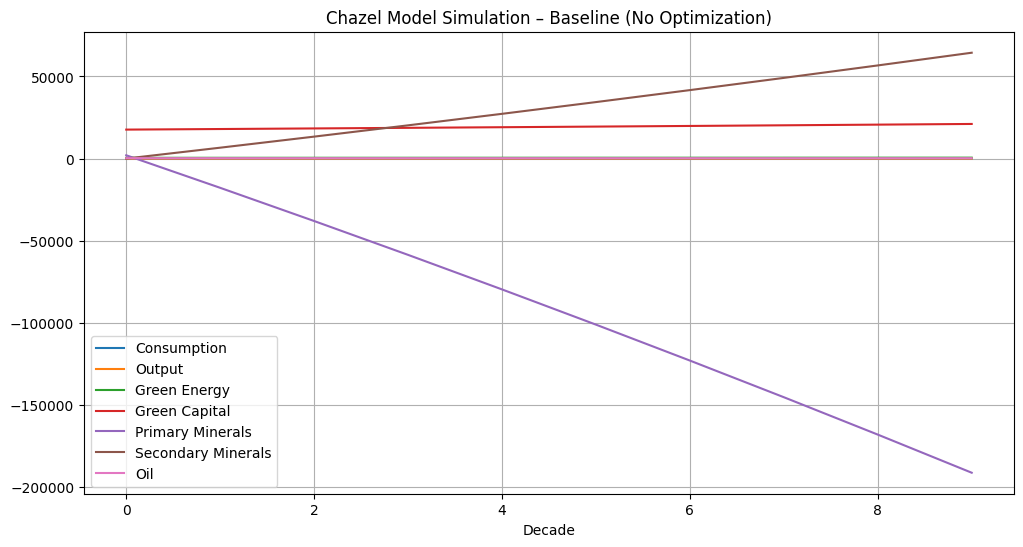

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(C, label="Consumption")
plt.plot(Y, label="Output")
plt.plot(E3, label="Green Energy")
plt.plot(Gt, label="Green Capital")
plt.plot(Mp[:T], label="Primary Minerals")
plt.plot(Ms[:T], label="Secondary Minerals")
plt.plot(R1[:T], label="Oil")
plt.legend()
plt.title("Chazel Model Simulation – Baseline (No Optimization)")
plt.xlabel("Decade")
plt.grid(True)
plt.show()

